In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import geopy.distance
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from numpy.linalg import eigh
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amz-delivery/data.csv


<h1> Exploratory Data Analysis</h1>

In [2]:
#df = pd.read_csv('')
data = pd.read_csv('/kaggle/input/amz-delivery/data.csv')
data1 = pd.read_csv('/kaggle/input/amz-delivery/data.csv')
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x1634,COIMBRES02DEL01,33.0,4.9,11.022477,76.995667,11.132477,77.105667,16-03-2022,22:60,23:10,Sandstorms,Low,0,Meal,motorcycle,1.0,No,Metropolitian,29.0
1,0x9d56,RANCHIRES18DEL02,32.0,4.1,23.351489,85.324253,23.371489,85.344253,26-03-2022,11:15,11:20,Stormy,High,2,Drinks,scooter,2.0,No,Metropolitian,34.0
2,0x44a8,COIMBRES01DEL01,35.0,4.8,11.016298,76.972076,11.126298,77.082076,06-03-2022,18:40,18:45,Fog,Medium,0,Buffet,motorcycle,2.0,No,Urban,37.0
3,0xc01,INDORES01DEL01,24.0,4.5,22.695207,75.866059,22.705207,75.876059,19-03-2022,9:10,9:15,Stormy,Low,2,Meal,motorcycle,0.0,No,Metropolitian,10.0
4,0x311e,CHENRES17DEL02,33.0,4.5,13.045479,80.233110,13.095479,80.283110,28-03-2022,17:50,18:05,Stormy,Medium,1,Buffet,motorcycle,1.0,No,Metropolitian,27.0


In [3]:
data.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken
count,43739.000000,43685.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,44600.000000,45593.000000
mean,29.567137,4.633780,17.017729,70.231332,17.465186,70.845702,1.023359,0.744664,26.294607
std,5.815155,0.334716,8.185109,22.883647,7.335122,21.118812,0.839065,0.572473,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.546947,75.898497,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [4]:
data.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weather                         object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken                     float64
dtype: object

In [5]:
data.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather                         616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken                        0
dtype: int64

In [93]:
data.shape

(44977, 11)

<h2> adding new column distance</h2>

In [6]:
distances = []
for index in range(data.shape[0]):
    res = (data['Restaurant_latitude'][index],data['Restaurant_longitude'][index])
    dest = (data['Delivery_location_latitude'][index], data['Delivery_location_longitude'][index])
    dist = geopy.distance.geodesic(dest,res).km
    distances.append(dist)
data['distance'] = distances

In [7]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,distance
0,0x1634,COIMBRES02DEL01,33.0,4.9,11.022477,76.995667,11.132477,77.105667,16-03-2022,22:60,...,Sandstorms,Low,0,Meal,motorcycle,1.0,No,Metropolitian,29.0,17.102523
1,0x9d56,RANCHIRES18DEL02,32.0,4.1,23.351489,85.324253,23.371489,85.344253,26-03-2022,11:15,...,Stormy,High,2,Drinks,scooter,2.0,No,Metropolitian,34.0,3.014625
2,0x44a8,COIMBRES01DEL01,35.0,4.8,11.016298,76.972076,11.126298,77.082076,06-03-2022,18:40,...,Fog,Medium,0,Buffet,motorcycle,2.0,No,Urban,37.0,17.102696
3,0xc01,INDORES01DEL01,24.0,4.5,22.695207,75.866059,22.705207,75.876059,19-03-2022,9:10,...,Stormy,Low,2,Meal,motorcycle,0.0,No,Metropolitian,10.0,1.510641
4,0x311e,CHENRES17DEL02,33.0,4.5,13.045479,80.233110,13.095479,80.283110,28-03-2022,17:50,...,Stormy,Medium,1,Buffet,motorcycle,1.0,No,Metropolitian,27.0,7.746212


In [8]:
data.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'], inplace=True, axis=1)
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken', 'distance'],
      dtype='object')

<h3>Changing data types of ordered date and time</h3>

In [9]:
for index in range(data.shape[0]):
    try:
        time = data['Time_Order_picked'][index]
        if time[-2:] == '60':
            time = str(int(time[:-3])+1)+':00'
        if time[:-3] == '24':
            time = '00' + time[-3:]
        if len(time) == 4:
            time = '0'+ time
            
        data['Time_Order_picked'][index] = time + ':00'
    except:
        continue

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
data['Time_Order_picked'] = pd.to_datetime(data['Time_Order_picked'],format= '%H:%M:%S' )

In [11]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'],format='%d-%m-%Y')

<h2>Finding and replacing missing data in the dataframe.</h2>

<h3>City<.h3>

In [12]:
cities = {}
    
for index in range(data.shape[0]):
    try:
        city = data['Delivery_person_ID'][index][:3]
        city_type = data['City'][index]
        if city not in cities and not pd.isnull(city_type):
            cities[city] = city_type
    except:
        continue
        
for index in range(data.shape[0]):
    try:
        if pd.isnull(data['City'][index]):
            data['City'][index] = cities[data['Delivery_person_ID'][index][:3]]
        
    except:
        continue

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [13]:
data['City'].isnull().sum()

0

<h3>Age</h3>

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Density'>

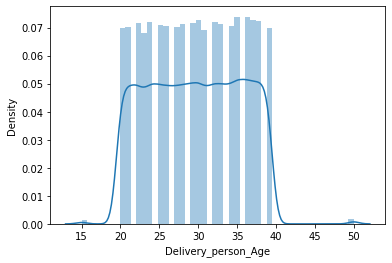

In [14]:
sns.distplot(data['Delivery_person_Age'])

In [15]:
data['Delivery_person_Age'].fillna(data['Delivery_person_Age'].median(),inplace=True)

In [16]:
data['Delivery_person_Age'].isnull().sum()

0

<h3>Ratings</h3>

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_person_Ratings', ylabel='Density'>

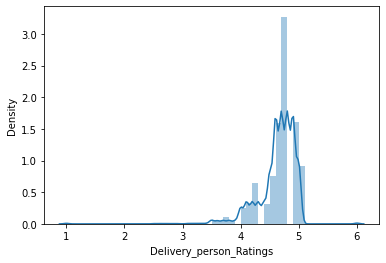

In [17]:
sns.distplot(data['Delivery_person_Ratings'])

In [18]:
data['Delivery_person_Ratings'].fillna(data['Delivery_person_Ratings'].median(),inplace=True)

In [19]:
data['Delivery_person_Ratings'].isnull().sum()

0

<h3>Multiple deliveries</h3>

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='multiple_deliveries', ylabel='Density'>

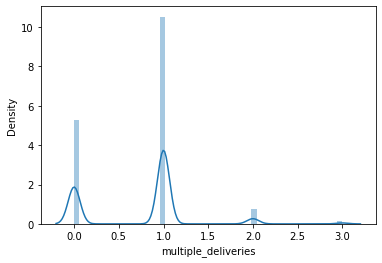

In [20]:
sns.distplot(data['multiple_deliveries'])

In [21]:
data['multiple_deliveries'].median()

1.0

In [22]:
data['multiple_deliveries'].fillna(data['multiple_deliveries'].median(),inplace=True)

In [23]:
data['multiple_deliveries'].isnull().sum()

0

<h3>Festivals</h3>

In [24]:
l=list(data[data.Festival=="Yes"].Order_Date)
holidays=list(set(l))

In [25]:
def fill_NaN_festival(df):
    for i in range(df.shape[0]):
        if pd.isnull(df["Festival"].iloc[i]):
            if df["Order_Date"].iloc[i] in holidays:
                df["Festival"].iloc[i]="Yes"
            else:
                df["Festival"].iloc[i]="No"
        else:
            pass
    df["Festival"]=df["Festival"].astype('category')
fill_NaN_festival(data)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [26]:
data.Festival.isnull().sum()

0

<h3>Time Ordered</h3>

In [27]:
differences = []
for index in range(data.shape[0]):
    try:
        time_ordered = data['Time_Orderd'][index]
        time_order_picked = data['Time_Order_picked'][index]
        if(not pd.isnull(time_ordered) and not pd.isnull(time_order_picked)):
            minut = int(time_order_picked[-2:]) - int(time_ordered[-2:])
            hour = int(time_order_picked[:-3]) - int(time_ordered[:-3])
            diff = 60*hour + minut
            differences.append(diff)
    except:
        continue

In [28]:
data.drop('Time_Orderd', inplace=True, axis=1)

<h3>Weather</h3>

In [29]:
data = data.dropna(axis=0, subset=['Weather'])

In [30]:
data['Weather'].isnull().sum()

0

In [31]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,distance
0,0x1634,COIMBRES02DEL01,33.0,4.9,2022-03-16,1900-01-01 23:10:00,Sandstorms,Low,0,Meal,motorcycle,1.0,No,Metropolitian,29.0,17.102523
1,0x9d56,RANCHIRES18DEL02,32.0,4.1,2022-03-26,1900-01-01 11:20:00,Stormy,High,2,Drinks,scooter,2.0,No,Metropolitian,34.0,3.014625
2,0x44a8,COIMBRES01DEL01,35.0,4.8,2022-03-06,1900-01-01 18:45:00,Fog,Medium,0,Buffet,motorcycle,2.0,No,Urban,37.0,17.102696
3,0xc01,INDORES01DEL01,24.0,4.5,2022-03-19,1900-01-01 09:15:00,Stormy,Low,2,Meal,motorcycle,0.0,No,Metropolitian,10.0,1.510641
4,0x311e,CHENRES17DEL02,33.0,4.5,2022-03-28,1900-01-01 18:05:00,Stormy,Medium,1,Buffet,motorcycle,1.0,No,Metropolitian,27.0,7.746212


In [32]:
data.shape

(44977, 16)

In [33]:
data.isnull().sum()

ID                         0
Delivery_person_ID         0
Delivery_person_Age        0
Delivery_person_Ratings    0
Order_Date                 0
Time_Order_picked          0
Weather                    0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
Time_taken                 0
distance                   0
dtype: int64

In [34]:
data.dtypes

ID                                 object
Delivery_person_ID                 object
Delivery_person_Age               float64
Delivery_person_Ratings           float64
Order_Date                 datetime64[ns]
Time_Order_picked          datetime64[ns]
Weather                            object
Road_traffic_density               object
Vehicle_condition                   int64
Type_of_order                      object
Type_of_vehicle                    object
multiple_deliveries               float64
Festival                         category
City                               object
Time_taken                        float64
distance                          float64
dtype: object

In [35]:
# data.drop('Order_Date',axis=1,inplace=True)
# data.drop('Time_Order_picked', axis=1,inplace=True)

In [36]:
data.dtypes

ID                                 object
Delivery_person_ID                 object
Delivery_person_Age               float64
Delivery_person_Ratings           float64
Order_Date                 datetime64[ns]
Time_Order_picked          datetime64[ns]
Weather                            object
Road_traffic_density               object
Vehicle_condition                   int64
Type_of_order                      object
Type_of_vehicle                    object
multiple_deliveries               float64
Festival                         category
City                               object
Time_taken                        float64
distance                          float64
dtype: object

category - weather,road_traffic_density,type_of_order,type_of_vehicle,city<br>
datetime - order_date, time_order_picked

In [37]:
data["Weather"]=data["Weather"].astype('category')
data["Type_of_order"]=data["Type_of_order"].astype('category')
data["Type_of_vehicle"]=data["Type_of_vehicle"].astype('category')
data["Road_traffic_density"]=data["Road_traffic_density"].astype('category')
data["City"]=data["City"].astype('category')

<h2>Data Visualization</h2>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Delivery_person_Age'>

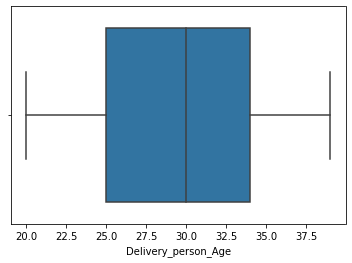

In [38]:
sns.boxplot(data['Delivery_person_Age'])

In [39]:
data.dtypes

ID                                 object
Delivery_person_ID                 object
Delivery_person_Age               float64
Delivery_person_Ratings           float64
Order_Date                 datetime64[ns]
Time_Order_picked          datetime64[ns]
Weather                          category
Road_traffic_density             category
Vehicle_condition                   int64
Type_of_order                    category
Type_of_vehicle                  category
multiple_deliveries               float64
Festival                         category
City                             category
Time_taken                        float64
distance                          float64
dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Delivery_person_Ratings'>

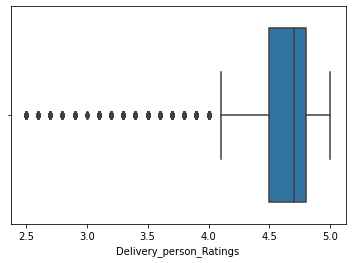

In [40]:
sns.boxplot(data['Delivery_person_Ratings'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Vehicle_condition'>

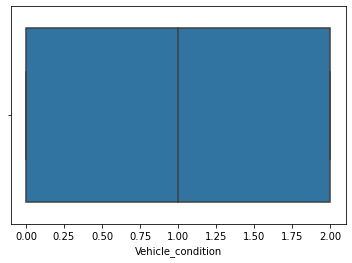

In [41]:
sns.boxplot(data['Vehicle_condition'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='multiple_deliveries'>

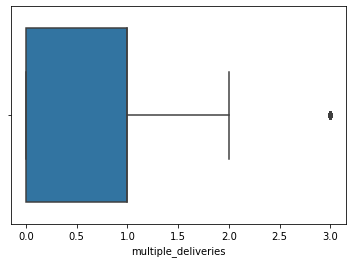

In [42]:
sns.boxplot(data['multiple_deliveries'])


<AxesSubplot:ylabel='distance'>

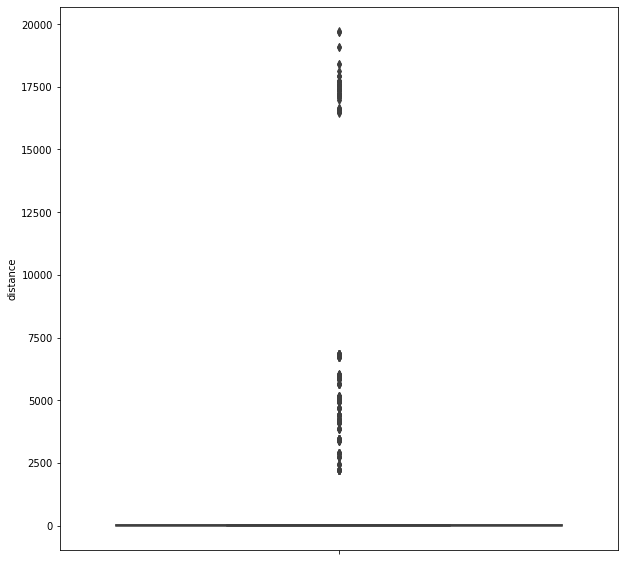

In [43]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data['distance'])

In [44]:
min(data['distance'])

1.4638371061422368

<b>Countplot of no of orders of different types in different types of cities</b>

<AxesSubplot:xlabel='City', ylabel='count'>

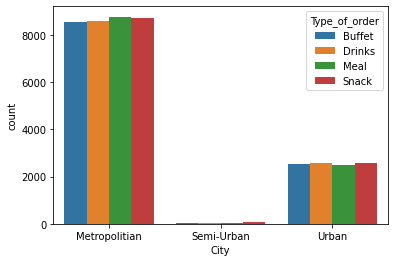

In [45]:
sns.countplot(x='City', data=data, hue=data['Type_of_order'])

<AxesSubplot:xlabel='City', ylabel='Time_taken'>

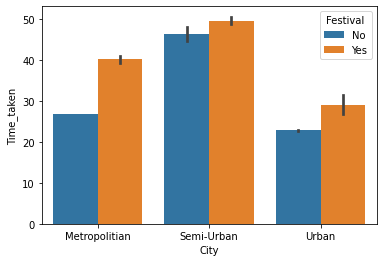

In [46]:
sns.barplot(x='City', y='Time_taken', hue='Festival', data=data)

<h2>Delivery person Ratings</h2>

<AxesSubplot:xlabel='Delivery_person_Ratings', ylabel='Time_taken'>

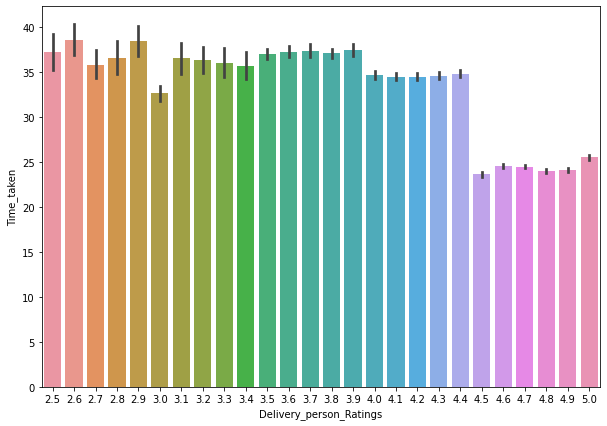

In [47]:
plt.figure(figsize=(10,7))
sns.barplot(x=data['Delivery_person_Ratings'],y=data['Time_taken'])

<AxesSubplot:xlabel='Time_Order_picked', ylabel='Density'>

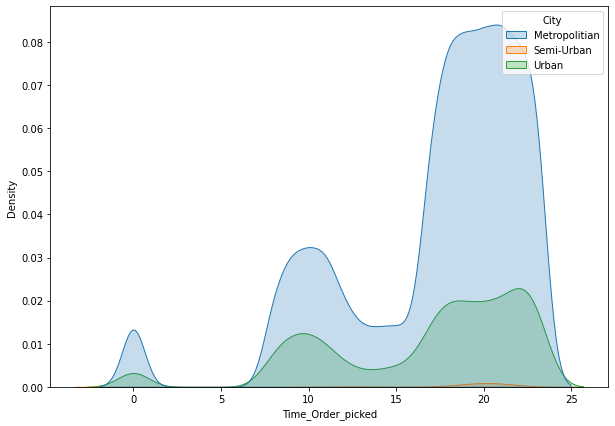

In [48]:
# sns.barplot(x=data['Time_Order_picked'], data=data)
plt.figure(figsize=(10,7))
sns.kdeplot(x=data["Time_Order_picked"].dt.hour,hue='City', data=data,shade=True,bw_adjust=1)


<AxesSubplot:xlabel='Time_taken', ylabel='Density'>

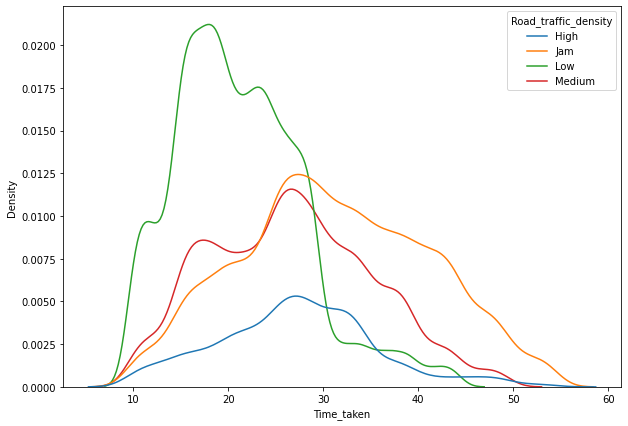

In [49]:
plt.figure(figsize=(10,7))
sns.kdeplot(data['Time_taken'], hue=data['Road_traffic_density'])

Top 15 Devilery Persons Delivey in this dataset


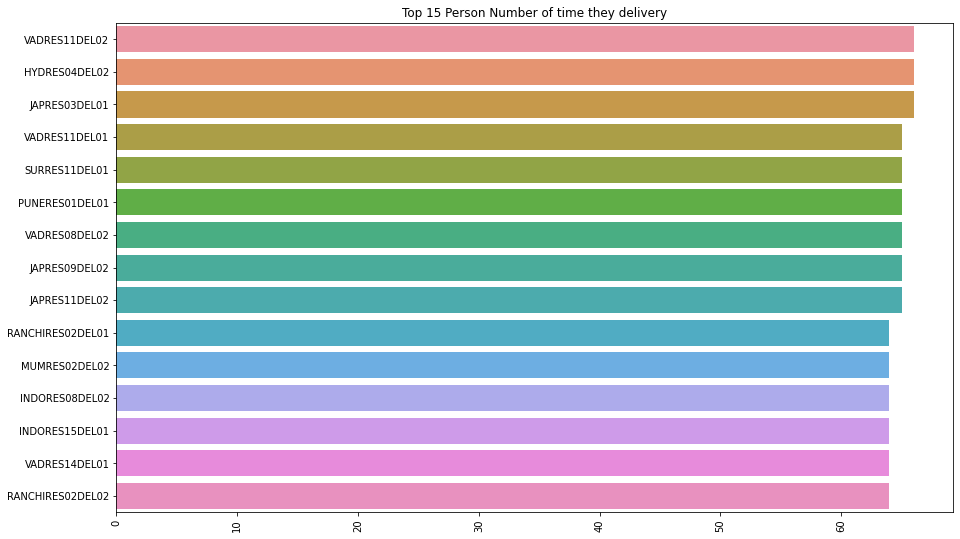

In [50]:
print('Top 15 Devilery Persons Delivey in this dataset')
plt.figure(figsize=(15, 9))
sns.barplot(y = data['Delivery_person_ID'].value_counts()[:15].index,
            x = data['Delivery_person_ID'].value_counts()[:15].values)
plt.xticks(rotation=90)
plt.title('Top 15 Person Number of time they delivery')
plt.show()

In [51]:
df_new = data.copy()

<AxesSubplot:xlabel='Weather', ylabel='count'>

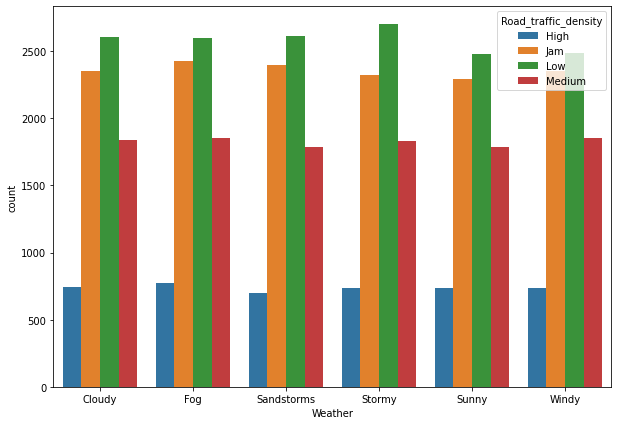

In [52]:
plt.figure(figsize=(10,7))
sns.countplot(x=data['Weather'], hue=data['Road_traffic_density'])

<AxesSubplot:xlabel='Weather', ylabel='Time_taken'>

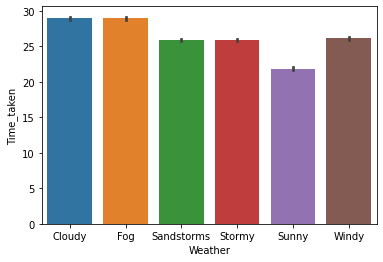

In [53]:
sns.barplot(y=data['Time_taken'], x=data['Weather'])

In [54]:
data.dtypes

ID                                 object
Delivery_person_ID                 object
Delivery_person_Age               float64
Delivery_person_Ratings           float64
Order_Date                 datetime64[ns]
Time_Order_picked          datetime64[ns]
Weather                          category
Road_traffic_density             category
Vehicle_condition                   int64
Type_of_order                    category
Type_of_vehicle                  category
multiple_deliveries               float64
Festival                         category
City                             category
Time_taken                        float64
distance                          float64
dtype: object

### Converting categorical data

In [55]:
list=['Weather','Road_traffic_density','Type_of_vehicle','Festival','City','Type_of_order']
for x in list:
    l = LabelEncoder()
    label = l.fit_transform(data[x])
    data.drop(x, axis=1, inplace=True)
    data[x] = label
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Order_picked,Vehicle_condition,multiple_deliveries,Time_taken,distance,Weather,Road_traffic_density,Type_of_vehicle,Festival,City,Type_of_order
0,0x1634,COIMBRES02DEL01,33.0,4.9,2022-03-16,1900-01-01 23:10:00,0,1.0,29.0,17.102523,2,2,1,0,0,2
1,0x9d56,RANCHIRES18DEL02,32.0,4.1,2022-03-26,1900-01-01 11:20:00,2,2.0,34.0,3.014625,3,0,2,0,0,1
2,0x44a8,COIMBRES01DEL01,35.0,4.8,2022-03-06,1900-01-01 18:45:00,0,2.0,37.0,17.102696,1,3,1,0,2,0
3,0xc01,INDORES01DEL01,24.0,4.5,2022-03-19,1900-01-01 09:15:00,2,0.0,10.0,1.510641,3,2,1,0,0,2
4,0x311e,CHENRES17DEL02,33.0,4.5,2022-03-28,1900-01-01 18:05:00,1,1.0,27.0,7.746212,3,3,1,0,0,0


In [56]:
#Droping attributes that are unnecessary  
data.drop("ID",axis=1, inplace=True)
data.drop("Delivery_person_ID",axis=1, inplace=True)
data.drop('Order_Date',axis=1,inplace=True)
data.drop('Time_Order_picked', axis=1,inplace=True)

<AxesSubplot:>

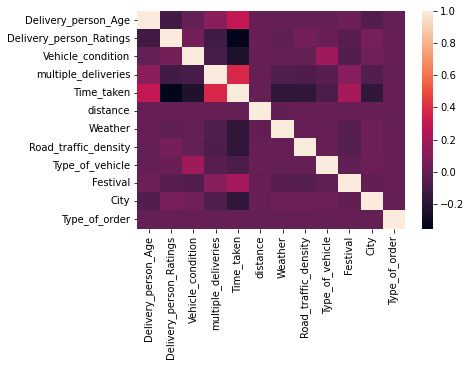

In [57]:
#correlation heatmap after coverting catagorical data
sns.heatmap(data.corr())

### Splitting the data into train and test

In [58]:
y = data['Time_taken']
y.head()

0    29.0
1    34.0
2    37.0
3    10.0
4    27.0
Name: Time_taken, dtype: float64

In [59]:
X=data
X.drop('Time_taken',axis=1,inplace=True)
X.head()



,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,distance,Weather,Road_traffic_density,Type_of_vehicle,Festival,City,Type_of_order
0,33.0,4.9,0,1.0,17.102523,2,2,1,0,0,2
1,32.0,4.1,2,2.0,3.014625,3,0,2,0,0,1
2,35.0,4.8,0,2.0,17.102696,1,3,1,0,2,0
3,24.0,4.5,2,0.0,1.510641,3,2,1,0,0,2
4,33.0,4.5,1,1.0,7.746212,3,3,1,0,0,0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=104, test_size=0.25, shuffle=True)


### MLR

In [61]:
mlr = sm.OLS(y, X)
mlr_res =mlr.fit()
mlr_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Time_taken   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                          4.637e+04
Date:                Wed, 30 Nov 2022   Prob (F-statistic):                        0.00
Time:                        11:25:22   Log-Likelihood:                     -1.5704e+05
No. Observations:               44977   AIC:                                  3.141e+05
Df Residuals:                   44966   BIC:                                  3.142e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Delivery_person_Age         0.6101      0.006     99.034      0.000       0.598       0.622
Delivery_person_Ratings     2.0438      0.047     43.395      0.000       1.952       2.136
Vehicle_condition          -2.0480      0.047    -43.556      0.000      -2.140      -1.956
multiple_deliveries         5.2279      0.067     78.005      0.000       5.097       5.359
distance                -8.085e-05   5.61e-05     -1.441      0.150      -0.000    2.91e-05
Weather                    -0.6669      0.022    -30.469      0.000      -0.710      -0.624
Road_traffic_density       -1.1179      0.040    -27.914      0.000      -1.196      -1.039
Type_of_vehicle             0.2060      0.064      3.220      0.001       0.081       0.331
Festival                    8.8963      0.244     36.413      0.000       8.417       9.375
City                       -1.2849      0.045    -28.507      0.000      -1.373      -1.197
Type_of_order               0.2703      0.033      8.094      0.000       0.205       0.336
==============================================================================
Omnibus:                      930.931   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              989.738
Skew:                           0.363   Prob(JB):                    1.21e-215
Kurtosis:                       3.015   Cond. No.                     4.37e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
print('ACCURACY :-',mlr_res.rsquared*100)

ACCURACY :- 91.89878579557822


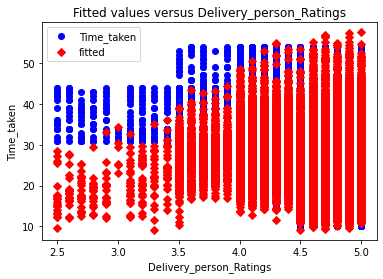

In [63]:
#fit-plot
b = sm.graphics.plot_fit(mlr_res,1, vlines=False)

<AxesSubplot:ylabel='Count'>

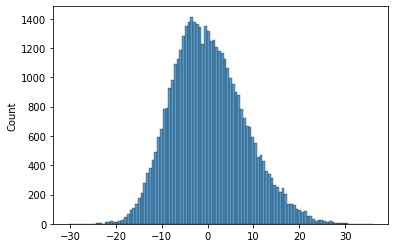

In [64]:
#MODEL VALIDATION using residual analysis
sns.histplot(mlr_res.resid)
#by the below graph we can evidently conclude that residuals follow normal distribution 

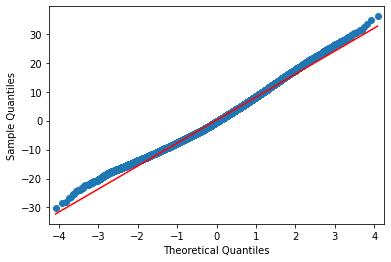

In [65]:
a = sm.qqplot(mlr_res.resid, line='s')

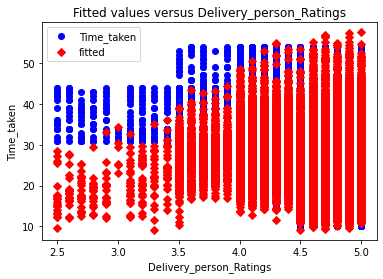

In [66]:
#plo
b = sm.graphics.plot_fit(mlr_res,1, vlines=False)

In [67]:
mlr = LinearRegression()  
mlr.fit(X_train, y_train)


LinearRegression()

In [68]:
y_pred_mlr= mlr.predict(X_test)

In [69]:
# import seaborn as sns
# plt.figure(figsize=(5, 7))


# ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
# sns.distplot(y_pred_mlr, hist=False, color="b", label="Fitted Values" , ax=ax)

In [70]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print(metrics.r2_score(y_test, y_pred_mlr))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('ACCURACY:-',metrics.r2_score(y_test, y_pred_mlr)*100)

0.41305645434424587
Mean Absolute Error: 5.756860758319233
Mean Square Error: 51.591006731200295
Root Mean Square Error: 7.182687987877539
ACCURACY:- 41.30564543442459


### MLR using PCA

In [71]:
#PCA
# Standardize the dataset; This is very important before you apply PCA
#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [72]:
# Perform PCA

# Determine covariance matrix
cov_matrix = np.cov(X_train_std, rowvar=False)

# Determine eigenvalues and eigenvectors
egnvalues, egnvectors = eigh(cov_matrix)

# Determine explained variance and select the most important eigenvectors based on explained variance
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]

# Construct projection matrix using the five eigenvectors that correspond to the top five eigenvalues (largest), to capture about 75% of the variance in this dataset
egnpairs = [(np.abs(egnvalues[i]), egnvectors[:, i])
                for i in range(len(egnvalues))]
egnpairs.sort(key=lambda k: k[0], reverse=True)
projectionMatrix = np.hstack((egnpairs[0][1][:, np.newaxis],
                              egnpairs[1][1][:, np.newaxis],
                              egnpairs[2][1][:, np.newaxis],
                              egnpairs[3][1][:, np.newaxis],
                              egnpairs[4][1][:, np.newaxis],
                              egnpairs[5][1][:, np.newaxis],
                              egnpairs[6][1][:, np.newaxis]))

# Transform the training data set
X_train_pca = X_train_std.dot(projectionMatrix)
X_test_pca = X_test_std.dot(projectionMatrix)

In [73]:
egnpairs.sort(key=lambda k: k[0], reverse=True)
print(egnvalues)

[0.78409827 0.83988445 0.87020304 0.9123885  0.97079013 0.9946396
 1.00534051 1.01174606 1.05390246 1.15026181 1.40707129]


In [74]:
X_train_pca

array([[-7.09963470e-01, -8.72961756e-01,  5.50925159e-01, ...,
         1.93782936e-01, -4.50538681e-01, -1.47578256e-01],
       [ 2.97752767e+00,  2.11172202e-01, -8.28508542e-01, ...,
        -5.67809622e-01,  1.09004386e+00,  8.45096246e-01],
       [ 1.05805814e+00, -1.02559165e+00, -1.09766209e+00, ...,
        -1.50925478e+00,  3.99447957e-01, -5.77446317e-01],
       ...,
       [-1.16654401e+00, -6.31020105e-01,  7.89685977e-02, ...,
         2.86434897e-03, -6.45198802e-01, -1.15692153e-03],
       [-9.70113659e-01, -5.52792099e-01,  8.40708561e-01, ...,
        -9.10738901e-01,  1.20595761e+00, -6.54111612e-01],
       [-6.14707390e-01,  1.31056224e+00, -1.12743903e+00, ...,
        -1.32955685e+00,  5.94760167e-01, -4.15037936e-01]])

In [75]:
from sklearn.linear_model import LinearRegression
mlr_pca = LinearRegression()  
mlr_pca.fit(X_train_pca, y_train)


LinearRegression()

In [76]:
y_pred_mlr_pca= mlr_pca.predict(X_test_pca)

In [77]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr_pca)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr_pca)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr_pca))
print(metrics.r2_score(y_test, y_pred_mlr_pca))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('ACCURACY:-',metrics.r2_score(y_test, y_pred_mlr_pca)*100)

0.40206162153428193
Mean Absolute Error: 5.762736198983409
Mean Square Error: 52.55742760371119
Root Mean Square Error: 7.249650171126272
ACCURACY:- 40.206162153428195


### XGboost

In [78]:
# XGBOOST
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [79]:
# Finding optimal hyperparameters
import xgboost as xgb
# # Parameters: 
# # n_estimators  "Number of gradient boosted trees. Equivalent to number 
# #                of boosting rounds."
# # learning_rate "Boosting learning rate (also known as “eta”)"
# # max_depth     "Maximum depth of a tree. Increasing this value will make 
# #                the model more complex and more likely to overfit." 

# from sklearn.model_selection import GridSearchCV
# # set up our search grid
# param_grid = {"max_depth":    [5, 6, 7],
#               "n_estimators": [800, 600, 700],
#               "learning_rate": [0.01, 0.02]}

# # trying out every combination of the above values
# search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

# print("The best hyperparameters are ",search.best_params_)

In [80]:
xgb_r = xgb.XGBRegressor(n_estimators=800, max_depth=7, learning_rate = 0.01)

  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
pred = xgb_r.predict(X_test)



In [81]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, pred)
meanSqErr = metrics.mean_squared_error(y_test, pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, pred))

print(metrics.r2_score(y_test, pred))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('ACCURACY:-',metrics.r2_score(y_test, pred)*100)

0.8338035199433433
Mean Absolute Error: 3.066707116649012
Mean Square Error: 14.6082937358572
Root Mean Square Error: 3.8220797657632946
ACCURACY:- 83.38035199433433


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time_taken', ylabel='Density'>

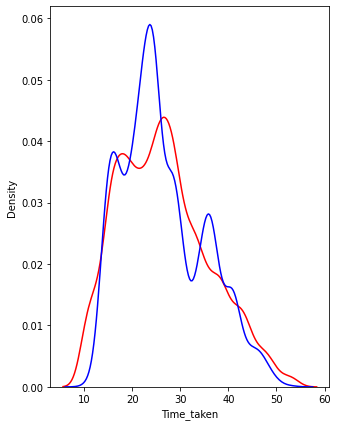

In [82]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(pred, hist=False, color="b", label="Fitted Values" , ax=ax)


In [83]:
# K-fold cross validation for XGboost
params = {'learning_rate': 0.01,'max_depth': 7}
# n_estimators=800, max_depth=7, learning_rate = 0.01
data_dmatrix = xgb.DMatrix(data=X,label=y)
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [84]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,27.179382,0.069930,27.179160,0.140641
1,26.916781,0.069253,26.916623,0.139971
2,26.656883,0.068584,26.656782,0.139304
3,26.399662,0.067921,26.399603,0.138676
4,26.145091,0.067265,26.145063,0.138071


In [85]:
print((cv_results["test-rmse-mean"]).tail(1))

49    17.072349
Name: test-rmse-mean, dtype: float64


In [86]:
#model validation XGboost
#cross val using sklearn
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb_r, X = X_train, y = y_train, cv = 10)
accuracies.mean()
# accuracies.std()

0.8342143969147194

### Random forest 

In [87]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
RF_regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
  
# fit the regressor with x and y data
RF_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [88]:
pred_RF = RF_regressor.predict(X_test)

In [89]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, pred_RF)
meanSqErr = metrics.mean_squared_error(y_test, pred_RF)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, pred_RF))
print(metrics.r2_score(y_test, pred_RF))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

0.8198883455341154
Mean Absolute Error: 3.160282431980351
Mean Square Error: 15.831406012882491
Root Mean Square Error: 3.978869941689787


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time_taken', ylabel='Density'>

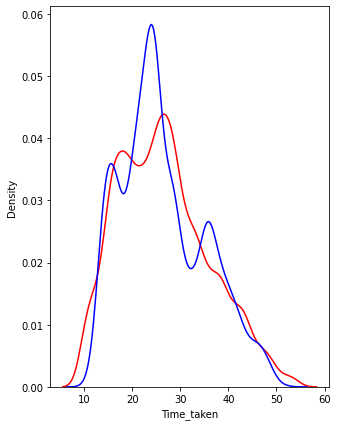

In [90]:
#graphs for XG and random forest 
#comparitive analysis if possible

import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(pred_RF, hist=False, color="b", label="Fitted Values" , ax=ax)

In [91]:
#model validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF_regressor, X = X_train, y = y_train, cv = 10)
accuracies.mean()

KeyboardInterrupt: 

In [ ]:
print('Random Forest model ACCURACY:-',metrics.r2_score(y_test, pred_RF)*100)
print('XGboost model ACCURACY:-',metrics.r2_score(y_test, pred)*100)
print('MLR using stats_model lib ACCURACY :-',mlr_res.rsquared*100)